<a href="https://colab.research.google.com/github/tranviviana/PyTorch/blob/main/01_PytorchWorkflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. get data ready (convert to tensors)
2. Build or pick a pretrained model

*   Pick a loss function and optimizer
*   Build a training loop
3. Fit the model to the data and make a prediction
4. Evaluate the model
5. Improve through experimentation
6. Save and reload your trained model

Exploring end to end workflow


In [1]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data (training)",
                      4: "making predictions and evaluating a model (inference)",
                      5: "saving and loading a model",
                      6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating a model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn ##nn contains all of pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.3.1+cu121'

##1. data: preparing and loading

could be anything


*   excel
*   images
*   Videos/audio/text
*   DNA


ML is a game of two parts:
1. get data into numerical representation
2. Build a model to learn patters about it

Using a linear regression formula to make a straight line with known **parameters**


In [3]:
#create *known* parameters
weight = 0.7 #slope
bias = 0.3 #intercept

#create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim =1)
Z = X.squeeze(dim=1)
Y = weight * X + bias

X[:10], Y[:10], Z[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]))

In [4]:
len(X), len(Y)

(50, 50)

In [5]:
#have our system figure out our formula
#splitting data into training and testing data --> important !
#training -> set the model learns patterns from ; validation -> tuning model ; test -> ready for new stuff


In [6]:
# create a train/test split
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

In [7]:
#visualizing data -> matplot
def plot_predictions(train_data = X_train,
                     train_labels = Y_train,
                     test_data = X_test,
                     test_labels = Y_test,
                     predictions = None):
  #plots training data, test data, and compares predictions
  plt.figure(figsize=(10,7))
  #training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #Are there predictions
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")
  plt.legend(prop={"size": 14})


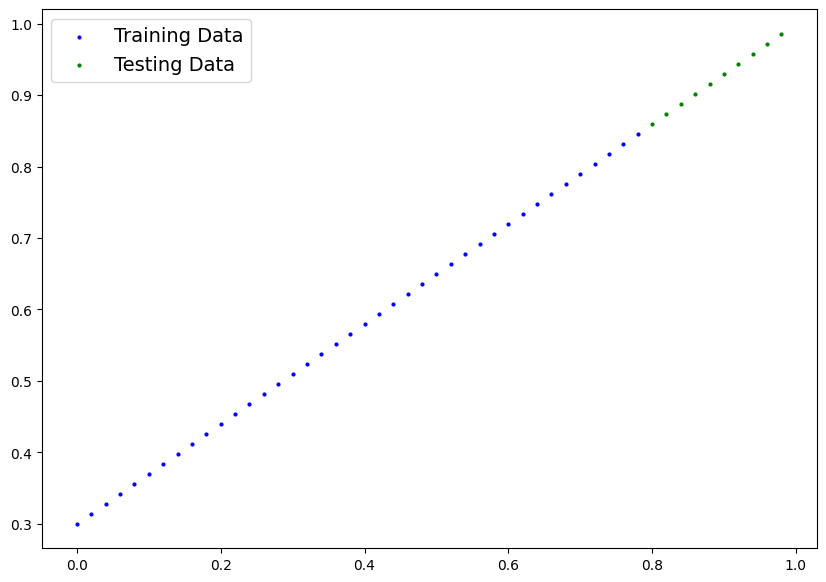

In [8]:
plot_predictions()

##2. Building model

1. Starts with random values (weight and bias)
2. Looks at training data and adjusts values to the ideal value

How does it do so?
1. gradient descent
2. backpropagation

In [10]:
#linear regression model class
class LinearRegressionModel(nn.Module):
  #good inheritor
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.rand(1,
                                      requires_grad=True,
                                      dtype=torch.float))
  # Forward method to define the computation in the model
  #x: is input type -> output type
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias




### pytorch model building essentials
* torch.nn - contains all of the buildings for computational graphs (aka neural nets)
* torch.nn.Parameter - what parameters are trying to learn, usually torch.nn will set this for us
* torch.nn.Module - base class for all nn modules, make sure to override forward if you make on
* torch.optim - this is where the optimizers in PyTorch live, helps with grad descent
* def forward() - all nn.module subclasses require and override tells what you are doing
https://pytorch.org/tutorials/beginner/ptcheat.html

In [17]:
### Checking contents of our pytorch model
#.parameters() check our model parameters
torch.manual_seed(42)
#create an instance of the model we created
model_0 = LinearRegressionModel()
model_0
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.3904], requires_grad=True)]

In [18]:
#named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

### predictions through torch.inference_mode()

To check our model's predictive power, lets see how well it predicts our dependent variable from our independent variable
pass date throuhg --> forward()

In [19]:
X_test, Y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [20]:
with torch.inference_mode(): #inference mode takes out the grad funcion
  y_preds= model_0(X_test)
  #torch.no_grad() similar but inference is preferred
y_preds


tensor([[0.6598],
        [0.6665],
        [0.6733],
        [0.6800],
        [0.6867],
        [0.6935],
        [0.7002],
        [0.7069],
        [0.7137],
        [0.7204]])

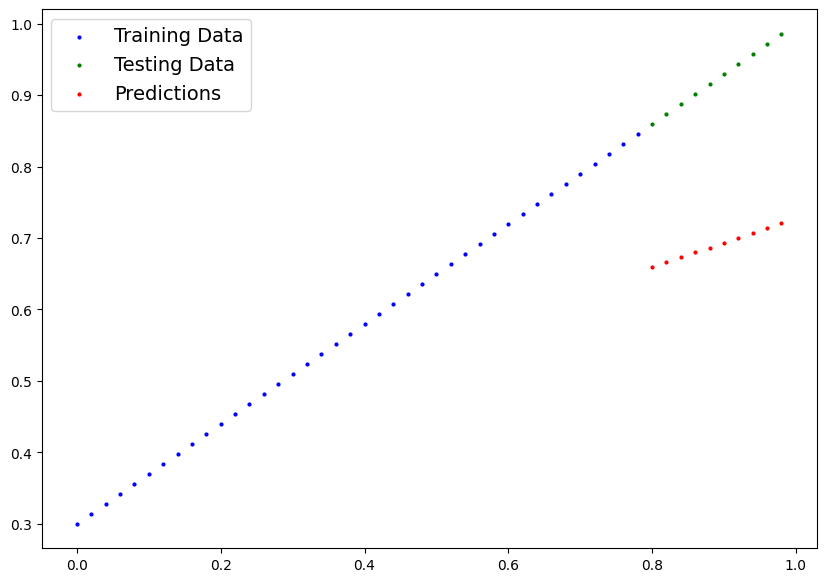

In [21]:
#the "random" predictions
plot_predictions(predictions = y_preds)

###2. Creating Training Code

move from unknown parameters to known parameters -> bad representation to good representation

Measure how poor/wrong model is, create a loss function(criterion/ cost function)

Things we need to train

**Loss Function**: function to measure how off a prediction is

**Optimizer**: take into account the loss of a model and adjusts the models parameters

    - inside an optimizer you have
        - params - the model parameters
        - lr (learning rate) - the hyperparameter that defines how big/small the optimizer changes the parameters with each step

And specifically for PyTorch, we need


*   training loop
*   testing loop



In [22]:
#looking at models parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.3904]))])

In [27]:
##setting up the loss function
"""MAE_loss (l1 norm) = torch.mean(torch.abs(y_pred-Y_test))"""
loss_fn = torch.nn.L1Loss()
## setting up the optimizer (stochastic gradient descent) changes one till it messes up and changes the other
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.01) #lr learning rate = adjustment rate

In [29]:
##Building a Training Loop (and teseting loop)

"""
0. Loop through the data
1. forward pass (this involves data moving through forward functions) to make predictions on data
2. Calculate the loss - compare pass predictions to ground truth labels
3. Optimizer zero grad
4. Loss backward [Back Propogation] - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss
5. Optimizer step [gradient descent] - use optimizer to adjust our model's parameters to try and improve the loss
"""

"\n0. Loop through the data \n1. forward pass (this involves data moving through forward functions) to make predictions on data\n2. Calculate the loss - compare pass predictions to ground truth labels\n3. Optimizer zero grad\n4. Loss backward [Back Propogation] - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to loss\n5. Optimizer step [gradient descent] - use optimizer to adjust our model's parameters to try and improve the loss\n"

In [30]:
# an epoch is one loop through the data ...
epochs = 1 #hyperparameter becasue we've set them ourselves


###training
#0. loop through the data
for epoch in range(epochs):
  #set model to training mode ... require gradients
  model_0.train()
  #1. Foward pass
  y_pred = model_0(X_train) #passing through the training data (part 1)

  #2. Calculate the loss
  loss = loss_fn(y_pred, Y_train) #from setting up loss function

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with repsect to the parameters of the model
  loss.backward()

  #5. step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer accumulates so we have to zero it so the step doesnt change

  #model_0.eval() #turns of gradient tracking
